#    BUKIN FUNCTION N. 6     

        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
        %
        % Authors: Sonja Surjanovic, Simon Fraser University
        %          Derek Bingham, Simon Fraser University
        % Questions/Comments: Please email Derek Bingham at dbingham@stat.sfu.ca.
        %
        % Copyright 2013. Derek Bingham, Simon Fraser University.
        %
        % THERE IS NO WARRANTY, EXPRESS OR IMPLIED. WE DO NOT ASSUME ANY LIABILITY
        % FOR THE USE OF THIS SOFTWARE.  If software is modified to produce
        % derivative works, such modified software should be clearly marked.
        % Additionally, this program is free software; you can redistribute it 
        % and/or modify it under the terms of the GNU General Public License as 
        % published by the Free Software Foundation; version 2.0 of the License. 
        % Accordingly, this program is distributed in the hope that it will be 
        % useful, but WITHOUT ANY WARRANTY; without even the implied warranty 
        % of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU 
        % General Public License for more details.
        %
        % For function details and reference information, see:
        % http://www.sfu.ca/~ssurjano/
        %
        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
        %
        % INPUTS:
        %
        % xx = [x1, x2]
        %
        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
        
        
    

In [3]:
import math
import numpy as np
import random
import timeit
import matplotlib.pyplot as plt

class CuckooSearchOptimization:
    def __init__(self, nestNumber, PoD, stepSize, Xrange, Yrange,Nf,MaxIter):
        self.Nf= Nf
        self.nestNumber= nestNumber
        self.PoD = PoD # Probability of discovered
        self.generation = 0 # current generation
        self.nests = [] # nests set
        self.fitness = [] # fitness set
        self.stepSize = stepSize # step size 'a'
        self.Xrange = Xrange # X problem range
        self.Yrange = Yrange # Y problem range
        
        self.population = [] # [nests, fitness] set

        self.MaxIter=MaxIter
    
    def bukin6(self, x1,x2): #return y

       

        

        term1 = 100 * math.sqrt(abs(x2 - 0.01*x1**2))
        term2 = 0.01 * abs(x1+10)

        y = term1 + term2

        return y


    def levyFlight(self):

        return math.pow(random.uniform(0.0001, 0.9999), -1.0 / 3.0)

    def visualize(self):
        data = self.nests[:].copy()
        x = []
        y = []
        for i in range(len(self.nests)) :
            x.append(data[i][0])
            y.append(data[i][1])
        plt.plot(x, y, 'ro')
        plt.axis([self.Xrange[0], self.Xrange[1], self.Yrange[0], self.Yrange[1]])
        plt.show()

    def search(self):
        # Init nests
        for i in range(self.nestNumber):
            X = round(random.uniform(self.Xrange[0], self.Xrange[1]), self.Nf)
            Y = round(random.uniform(self.Yrange[0], self.Yrange[1]), self.Nf)
            self.fitness.append(round(self.bukin6(X, Y),4))
            self.nests.append(np.array([X, Y]))
       
        self.population = list([self.nests, self.fitness])
        Nests= np.array(self.nests)
        Fitness= np.array(self.fitness)
        
        #self.population = self.population.T # transpose matrix
        sortedIndex= np.argsort(Fitness)
        #print ( 'sortedIndex =\n', sortedIndex)
        Nests = Nests[sortedIndex] # sorting
        Fitness = Fitness[sortedIndex] # sorting
        self.nests= list (Nests)
        self.fitness= list(Fitness)
        self.population = list([Nests, Fitness])
        print('maximum initilized solution   : \n',  Nests[0], "\n", Fitness[0])
        self.visualize()

        while self.generation < self.MaxIter:
            self.generation += 1
            # Get a cuckoo randomly by levy flight
            
            cuckooNest = self.nests[random.randint(0, len(self.nests) - 1)]
            levyX = self.levyFlight()
            levyY = self.levyFlight()
            cuckooNest = np.array([round(cuckooNest[0]+self.stepSize*levyX, self.Nf), round(cuckooNest[1]+self.stepSize*levyY, self.Nf)])
            randomNestIndex = random.randint(0, len(self.nests) - 1)

            # Evaluate and replace
            if (self.fitness[randomNestIndex] > self.bukin6(cuckooNest[0], cuckooNest[1])):
                self.nests[randomNestIndex]= cuckooNest
                self.fitness[randomNestIndex] = self.bukin6(cuckooNest[0], cuckooNest[1])
                self.population = list([self.nests, self.fitness])
                
            # PoD of worse nests are abandoned and new ones built
            for i in range(len(self.nests) - int(self.PoD * self.nestNumber), self.nestNumber):
                X = round(random.uniform(self.Xrange[0], self.Xrange[1]), self.Nf)
                Y = round(random.uniform(self.Yrange[0], self.Yrange[1]), self.Nf)
                self.nests[i]= np.array([X, Y])
                self.fitness[i]= round(self.bukin6(X, Y), 4)
            Nests= np.array(self.nests)
            Fitness= np.array(self.fitness)

            #self.population = self.population.T # transpose matrix
            sortedIndex= np.argsort(Fitness)
            #print ( 'sortedIndex =\n', sortedIndex)
            Nests = Nests[sortedIndex] # sorting
            Fitness = Fitness[sortedIndex] # sorting
            self.nests= list (Nests)
            self.fitness= list(Fitness)
            self.population = list([Nests, Fitness])
            
            if self.generation % 10000 == 0:
                print( 'Itertion Number:', self.generation )
                self.visualize()
        print('Optimum Fitness is: \n', self.fitness[0])
        print('Optimum Solution is: \n', self.nests[0])
        
       
        

                


maximum initilized solution   : 
 [-13.484092   1.971736] 
 39.2176


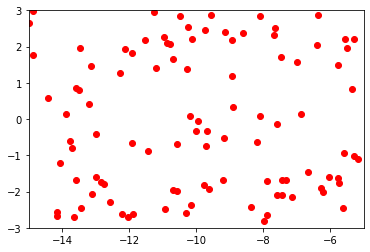

Itertion Number: 10000


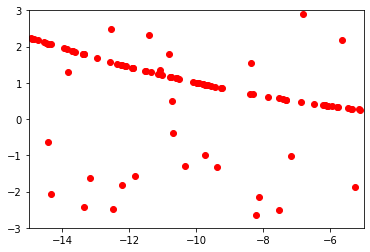

Itertion Number: 20000


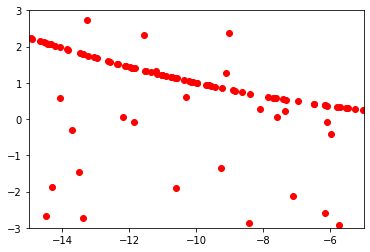

Itertion Number: 30000


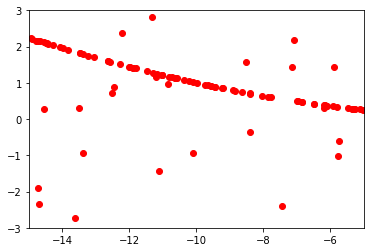

Itertion Number: 40000


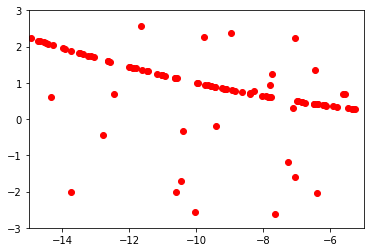

Itertion Number: 50000


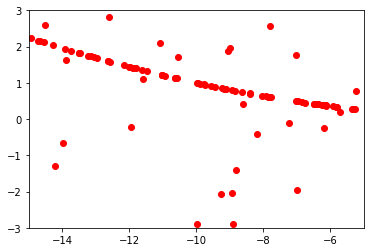

Itertion Number: 60000


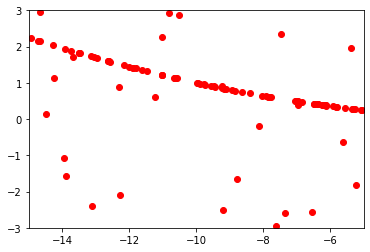

Itertion Number: 70000


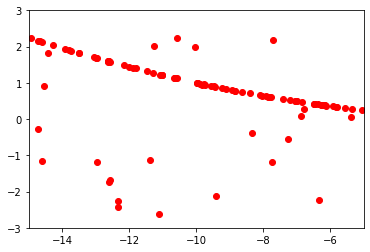

Itertion Number: 80000


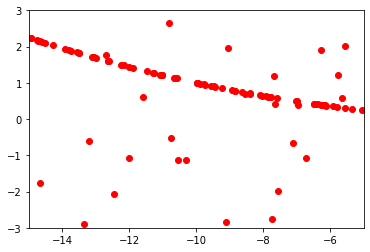

Itertion Number: 90000


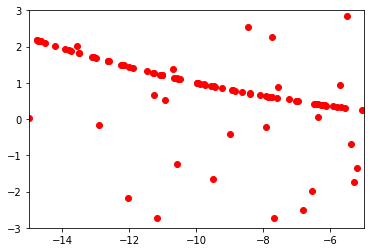

Itertion Number: 100000


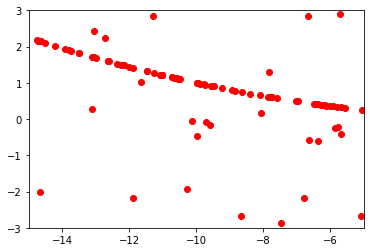

Optimum Fitness is: 
 0.0281
Optimum Solution is: 
 [-11.082274   1.228168]
Total Time is:  8.358877833000008


In [4]:

Cuckoosearchoptimization = CuckooSearchOptimization(100, 0.25, 1, [-15,-5],[-3,3],6,100000)
start = timeit.default_timer()
Cuckoosearchoptimization.search()
End = timeit.default_timer()
print('Total Time is: ', End - start)